# RTMA and URMA

This tutorial shows you how to download the Real-Time Mesoscale Analysis (RTMA) and Un-Restricted Mesoscale Analysis (URMA) products with the Herbie Python package.

- For RTMA, use `model='rtma'`
- For RTMA Alaska, use `model='rtma_ak'`
- For URMA, use `model='urma'`
- For URMA Alaska, use `model='urma_ak'`


In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp, cm_pcp, cm_wind

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie(
    "2023-01-01 06:00",
    model="rtma",
    product="anl",
)

✅ Found ┊ model=rtma ┊ product=anl ┊ 2023-Jan-01 06:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


In [3]:
# Show available products
H.PRODUCTS

{'anl': 'Analysis',
 'err': 'Analysis Forecast Error',
 'ges': 'Forecasts',
 'pcp': 'Precipitation Field'}

In [4]:
H.SOURCES

{'aws': 'https://noaa-rtma-pds.s3.amazonaws.com/rtma2p5.20230101/rtma2p5.t06z.2dvaranl_ndfd.grb2_wexp',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/rtma/prod/rtma2p5.20230101/rtma2p5.t06z.2dvaranl_ndfd.grb2_wexp'}

Since there is no index file, we need to download the full file before we can look at the contents with wgrib2.


In [5]:
H.download()

PosixPath('/p/cwfs/blaylock/data/rtma/20230101/rtma2p5.t06z.2dvaranl_ndfd.grb2_wexp')

In [6]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,7490118,0-7490118,2023-01-01 06:00:00,2023-01-01 06:00:00,HGT,surface,anl,:HGT:surface:anl
1,2,7490118,14980236,7490118-14980236,2023-01-01 06:00:00,2023-01-01 06:00:00,PRES,surface,anl,:PRES:surface:anl
2,3,14980236,21065993,14980236-21065993,2023-01-01 06:00:00,2023-01-01 06:00:00,TMP,2 m above ground,anl,:TMP:2 m above ground:anl
3,4,21065993,27151750,21065993-27151750,2023-01-01 06:00:00,2023-01-01 06:00:00,DPT,2 m above ground,anl,:DPT:2 m above ground:anl
4,5,27151750,32769386,27151750-32769386,2023-01-01 06:00:00,2023-01-01 06:00:00,UGRD,10 m above ground,anl,:UGRD:10 m above ground:anl
5,6,32769386,38387022,32769386-38387022,2023-01-01 06:00:00,2023-01-01 06:00:00,VGRD,10 m above ground,anl,:VGRD:10 m above ground:anl
6,7,38387022,45409020,38387022-45409020,2023-01-01 06:00:00,2023-01-01 06:00:00,SPFH,2 m above ground,anl,:SPFH:2 m above ground:anl
7,8,45409020,51026656,45409020-51026656,2023-01-01 06:00:00,2023-01-01 06:00:00,WDIR,10 m above ground,anl,:WDIR:10 m above ground:anl
8,9,51026656,56644292,51026656-56644292,2023-01-01 06:00:00,2023-01-01 06:00:00,WIND,10 m above ground,anl,:WIND:10 m above ground:anl
9,10,56644292,62261928,56644292-62261928,2023-01-01 06:00:00,2023-01-01 06:00:00,GUST,10 m above ground,anl,:GUST:10 m above ground:anl


In [7]:
ds = H.xarray("TMP:2 m")
ds

<xarray.Dataset>
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 2023-01-01T06:00:00
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 19.23 19.23 19.24 ... 54.38 54.38 54.37
    longitude            (y, x) float64 233.7 233.7 233.8 ... 300.9 300.9 301.0
    valid_time           datetime64[ns] 2023-01-01T06:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 294.6 294.7 294.6 ... 264.0 264.0 264.0
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma
    product:                 anl
    description:             CONUS Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /p/cwfs/blaylock/data/rtma/20230101/rtma2p5.t06z...
    local_grib:              /p/cwfs/blaylock/data/rtma/20230101/subset_c8efb...
    search:            TMP:2 m

Text(1.0, 1.0, '2 metre temperature')

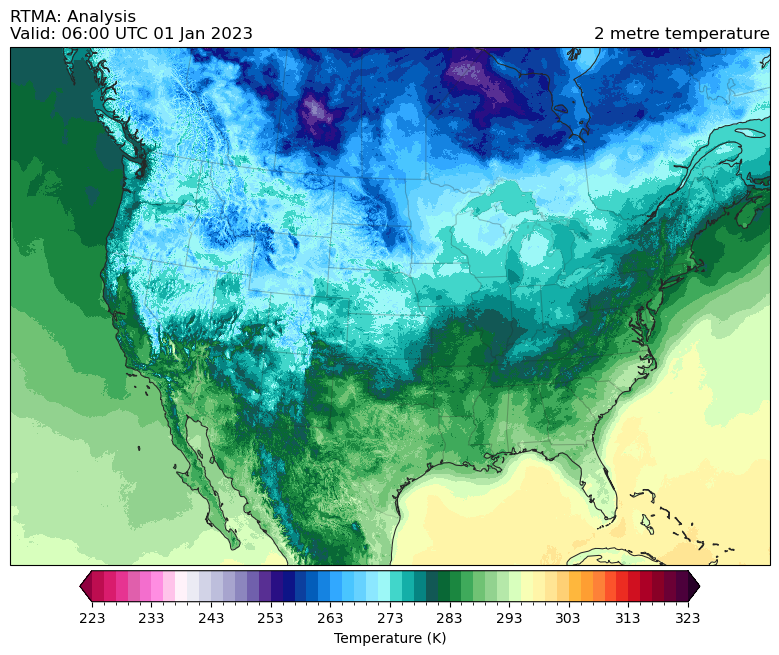

In [8]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m,
    transform=pc,
    **cm_tmp(units="K").cmap_kwargs,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **cm_tmp(units="K").cbar_kwargs,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")

## RTMA Precipitation

The precipitation data is found in a different file, but Herbie will locate it when you `produce='pcp'`.


In [9]:
H = Herbie(
    "2023-01-01 06:00",
    model="rtma",
    product="pcp",
)

✅ Found ┊ model=rtma ┊ product=pcp ┊ 2023-Jan-01 06:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


In [10]:
H.download()

PosixPath('/p/cwfs/blaylock/data/rtma/20230101/rtma2p5.2023010106.pcp.184.grb2')

In [11]:
ds = H.xarray()
ds["tp"] = ds.tp.where(ds.tp > 0)
ds

/p/home/blaylock/BB_python/Herbie/herbie/core.py:1048: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset>
Dimensions:              (y: 1377, x: 2145)
Coordinates:
    time                 datetime64[ns] 2023-01-01T05:00:00
    step                 timedelta64[ns] 01:00:00
    heightAboveSea       float64 0.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    tp                   (y, x) float32 nan nan nan nan nan ... nan nan nan nan
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma
    product:                 pcp
    description:             CONUS Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /p/cwfs/blaylock/data/rtma/20230101/rtma2p5.2023...
    local_grib:              /p/cwfs/blaylock/data/rtma/20230101/rtma2p5.2023...
    search:            None

Text(1.0, 1.0, 'Total Precipitation')

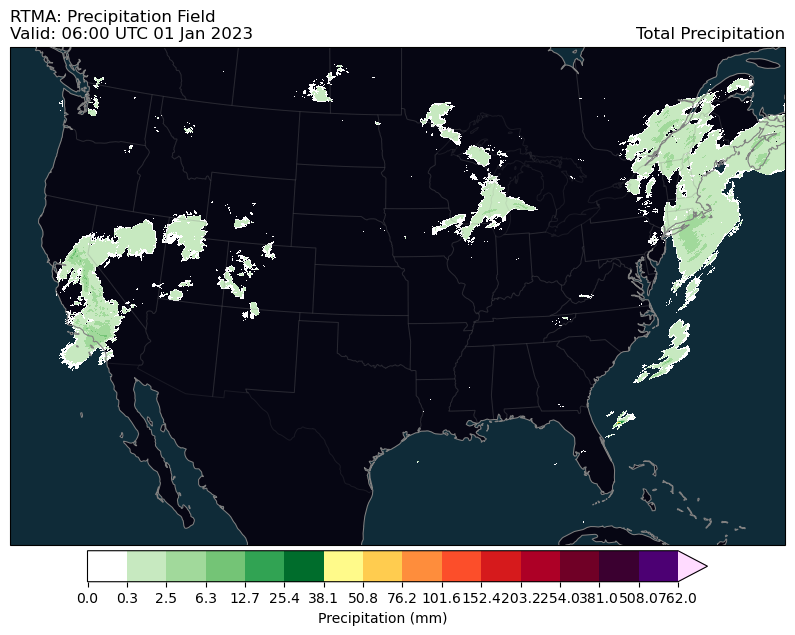

In [12]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8], dark=True).STATES().OCEAN().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.tp,
    transform=pc,
    **cm_pcp(units="mm").cmap_kwargs,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **cm_pcp().cbar_kwargs,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.tp.GRIB_name, loc="right")

## RTMA Alaska


In [13]:
H = Herbie(
    "2023-01-01 06:00",
    model="rtma_ak",
    product="anl",
)

✅ Found ┊ model=rtma_ak ┊ product=anl ┊ 2023-Jan-01 06:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


In [14]:
H.download()

PosixPath('/p/cwfs/blaylock/data/rtma_ak/20230101/akrtma.t06z.2dvaranl_ndfd_3p0.grb2')

In [15]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,3644462,0-3644462,2023-01-01 06:00:00,2023-01-01 06:00:00,HGT,surface,anl,:HGT:surface:anl
1,2,3644462,7288924,3644462-7288924,2023-01-01 06:00:00,2023-01-01 06:00:00,PRES,surface,anl,:PRES:surface:anl
2,3,7288924,10250082,7288924-10250082,2023-01-01 06:00:00,2023-01-01 06:00:00,TMP,2 m above ground,anl,:TMP:2 m above ground:anl
3,4,10250082,13211240,10250082-13211240,2023-01-01 06:00:00,2023-01-01 06:00:00,DPT,2 m above ground,anl,:DPT:2 m above ground:anl
4,5,13211240,16172398,13211240-16172398,2023-01-01 06:00:00,2023-01-01 06:00:00,UGRD,10 m above ground,anl,:UGRD:10 m above ground:anl
5,6,16172398,18905788,16172398-18905788,2023-01-01 06:00:00,2023-01-01 06:00:00,VGRD,10 m above ground,anl,:VGRD:10 m above ground:anl
6,7,18905788,21866946,18905788-21866946,2023-01-01 06:00:00,2023-01-01 06:00:00,SPFH,2 m above ground,anl,:SPFH:2 m above ground:anl
7,8,21866946,24600336,21866946-24600336,2023-01-01 06:00:00,2023-01-01 06:00:00,WDIR,10 m above ground,anl,:WDIR:10 m above ground:anl
8,9,24600336,27333726,24600336-27333726,2023-01-01 06:00:00,2023-01-01 06:00:00,WIND,10 m above ground,anl,:WIND:10 m above ground:anl
9,10,27333726,30067116,27333726-30067116,2023-01-01 06:00:00,2023-01-01 06:00:00,GUST,10 m above ground,anl,:GUST:10 m above ground:anl


In [16]:
ds = H.xarray("WIND:10 m")
ds

<xarray.Dataset>
Dimensions:              (y: 1105, x: 1649)
Coordinates:
    time                 datetime64[ns] 2023-01-01T06:00:00
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 10.0
    latitude             (y, x) float64 40.53 40.54 40.55 ... 64.02 64.0 63.98
    longitude            (y, x) float64 181.4 181.5 181.5 ... 266.2 266.3 266.3
    valid_time           datetime64[ns] 2023-01-01T06:00:00
Dimensions without coordinates: y, x
Data variables:
    si10                 (y, x) float32 14.57 14.62 14.68 ... 1.67 1.67 1.68
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma_ak
    product:                 anl
    description:             Alaska Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /p/cwfs/blaylock/data/rtma_ak/20230101/akrtma.t0...
    local_grib:              /p/cwfs/blaylock/data/rtma_ak/20230101/subset_c8...
    search:            WIND:10 m

Text(1.0, 1.0, '10 metre wind speed')

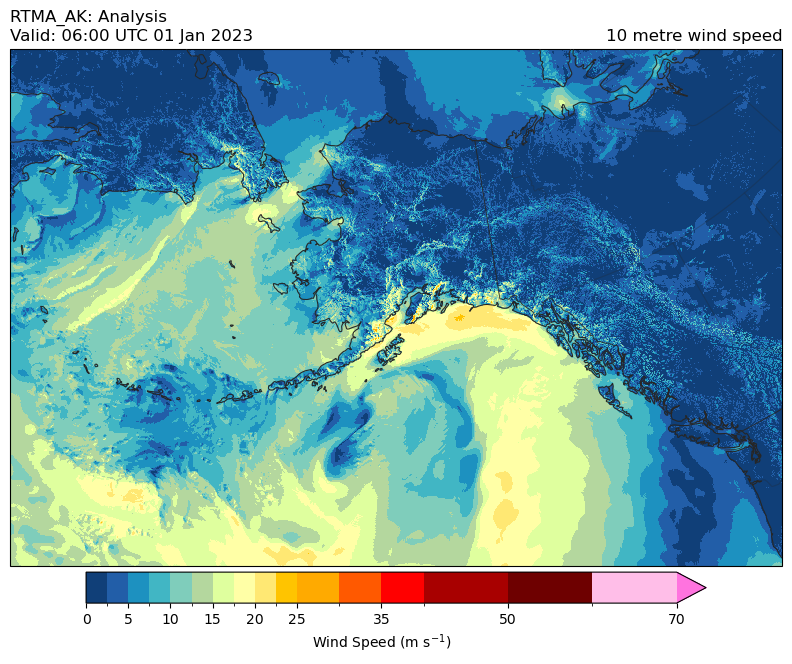

In [17]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().BORDERS().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.si10,
    transform=pc,
    **cm_wind().cmap_kwargs,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **cm_wind().cbar_kwargs,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.si10.GRIB_name, loc="right")

## RTMA vs URMA

For fun, let's compare the differences between the RTMA and the URMA analyses and see where the differences are for a particular time.

In [18]:
from herbie import Herbie
import matplotlib.pyplot as plt
from toolbox import EasyMap, pc

In [19]:
# Just open the entire GRIB2 files (opened in multiple DataSets)
rtma = Herbie("2023-05-22 00:00", model="rtma").xarray()
urma = Herbie("2023-05-22 00:00", model="urma").xarray()

✅ Found ┊ model=rtma ┊ product=anl ┊ 2023-May-22 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws


/p/home/blaylock/BB_python/Herbie/herbie/core.py:1048: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=urma ┊ product=anl ┊ 2023-May-22 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


/p/home/blaylock/BB_python/Herbie/herbie/core.py:1048: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


Note: Returning a list of [6] xarray.Datasets because cfgrib opened with multiple hypercubes.


In [20]:
rtma[3]

<xarray.Dataset>
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 2023-05-22
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 19.23 19.23 19.24 ... 54.38 54.38 54.37
    longitude            (y, x) float64 233.7 233.7 233.8 ... 300.9 300.9 301.0
    valid_time           datetime64[ns] 2023-05-22
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    d2m                  (y, x) float32 ...
    sh2                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rtma
    product:                 anl
    description:             CONUS Real-Time Mesoscale Analysis (RTMA)
    remote_grib:             /p/cwfs/blaylock/data/rtma/20230522/rtma2p5.t00z...
    local_grib:              /p/cwfs/blaylock/data/rtma/20230522/rtma2p5.t00z...
    search:            None

In [21]:
urma[3]

<xarray.Dataset>
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 2023-05-22
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 19.23 19.23 19.24 ... 54.38 54.38 54.37
    longitude            (y, x) float64 233.7 233.7 233.8 ... 300.9 300.9 301.0
    valid_time           datetime64[ns] 2023-05-22
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    d2m                  (y, x) float32 ...
    sh2                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   urma
    product:                 anl
    description:             CONUS Un-Restricted Mesoscale Analysis (URMA)
    remote_grib:             /p/cwfs/blaylock/data/urma/20230522/urma2p5.t00z...
    local_grib:              /p/cwfs/blaylock/data/urma/20230522/urma2p5.t00z...
    search:            None

Just to confirm, both the RTMA and URMA have the same grid size and map projection.

In [22]:
print("RTMA:", rtma[3].herbie.crs)
print("URMA:", urma[3].herbie.crs)

RTMA: +proj=lcc +ellps=sphere +a=6371200.0 +b=6371200.0 +lon_0=265.0 +lat_0=25.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +lat_2=25.0 +no_defs +type=crs
URMA: +proj=lcc +ellps=sphere +a=6371200.0 +b=6371200.0 +lon_0=265.0 +lat_0=25.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +lat_2=25.0 +no_defs +type=crs


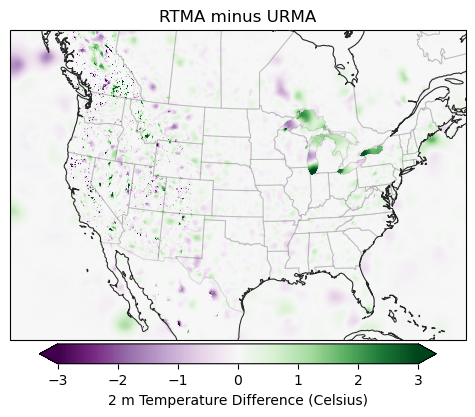

In [23]:
crs = rtma[3].herbie.crs

ax = EasyMap("50m", crs=crs).STATES().ax

art = ax.pcolormesh(
    rtma[3].longitude,
    rtma[3].latitude,
    (rtma[3].t2m - urma[3].t2m),
    transform=pc,
    cmap="PRGn",
    vmax=3,
    vmin=-3,
)

ax.set_title("RTMA minus URMA")

art = plt.colorbar(
    art,
    ax=ax,
    label="2 m Temperature Difference (Celsius)",
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    extend="both",
)

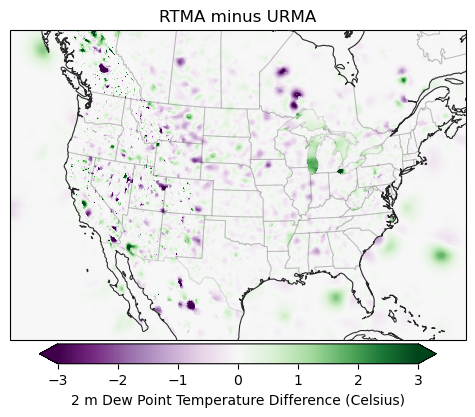

In [24]:
crs = rtma[3].herbie.crs

ax = EasyMap("50m", crs=crs).STATES().ax

art = ax.pcolormesh(
    rtma[3].longitude,
    rtma[3].latitude,
    (rtma[3].d2m - urma[3].d2m),
    transform=pc,
    cmap="PRGn",
    vmax=3,
    vmin=-3,
)

ax.set_title("RTMA minus URMA")

art = plt.colorbar(
    art,
    ax=ax,
    label="2 m Dew Point Temperature Difference (Celsius)",
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    extend="both",
)

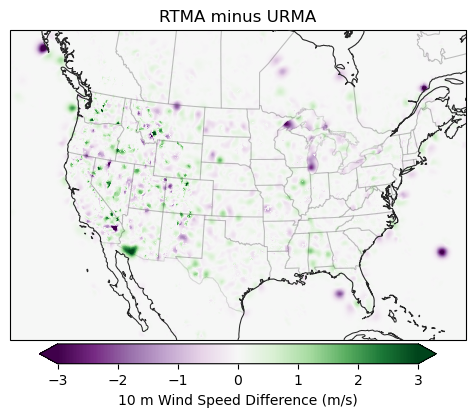

In [25]:
crs = rtma[3].herbie.crs

ax = EasyMap("50m", crs=crs).STATES().ax

art = ax.pcolormesh(
    rtma[2].longitude,
    rtma[2].latitude,
    (rtma[2].si10 - urma[2].si10),
    transform=pc,
    cmap="PRGn",
    vmax=3,
    vmin=-3,
)

ax.set_title("RTMA minus URMA")

art = plt.colorbar(
    art,
    ax=ax,
    label="10 m Wind Speed Difference (m/s)",
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    extend="both",
)